<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Geopandas" data-toc-modified-id="Geopandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Geopandas</a></span></li><li><span><a href="#Keppler-using-geojson" data-toc-modified-id="Keppler-using-geojson-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Keppler using geojson</a></span><ul class="toc-item"><li><span><a href="#Loading-and-exploring-datasets" data-toc-modified-id="Loading-and-exploring-datasets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loading and exploring datasets</a></span></li><li><span><a href="#Working-with-geopandas" data-toc-modified-id="Working-with-geopandas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Working with geopandas</a></span><ul class="toc-item"><li><span><a href="#sjoin-in-geopandas" data-toc-modified-id="sjoin-in-geopandas-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>sjoin in geopandas</a></span></li><li><span><a href="#Dissolve-methods" data-toc-modified-id="Dissolve-methods-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Dissolve methods</a></span></li></ul></li><li><span><a href="#Creating-the-map" data-toc-modified-id="Creating-the-map-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Creating the map</a></span></li><li><span><a href="#Save-the-config.py-and-html-map" data-toc-modified-id="Save-the-config.py-and-html-map-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Save the config.py and html map</a></span></li></ul></li></ul></div>

![portada](https://miro.medium.com/max/7077/1*0l-WeqdtYRruoV_XxS-ZKg.png)

#  Libraries

In [ ]:
import pandas as pd
import geopandas as gpd
from keplergl import KeplerGl
import rtree
import pygeos


# Geopandas

Kepler also makes it convenient to use geometrical data types such as polygons, lines, and points from GeoJSON, Shapely, and many other extensions.

In the this example, I’ll use the Vancouver Open Data; more precisely, two datasets containing data on the outlines of the blocks, and one containing the location of graffiti in the city.

To perform the map we use two datasets containing data on the outlines of the blocks, and one containing the location of graffiti in the city.

🏬🏬  **Datasets Block** 🏬🏬   ==> https://opendata.vancouver.ca/explore/dataset/block-outlines/information/  

Datasets Graffiti ==> https://opendata.vancouver.ca/explore/dataset/graffiti/export/

# Keppler using geojson

## Loading and exploring datasets

In [ ]:
block = gpd.read_file('../Input/block-outlines.geojson')
graffiti = gpd.read_file('../Input/graffiti.geojson')


In [ ]:
#Check if there are any null data



In [ ]:
#Check if there are any null data


In [ ]:
# drop the null data


## Working with geopandas 

### sjoin in geopandas

GeoPandas .sjoin is somewhat similar to a SQL join, but instead of looking at some index, it will look at the geometries — that means, it checks if the points are inside our polygon and return a row for each match.

![sjoin](https://i.stack.imgur.com/aP3px.png)

Once we have the dataset, we proceed to join of the two datasets. `Geopandas` has its own method to do the joins **[sjoin](https://geopandas.org/docs/user_guide/mergingdata.html)**. This method receive:

1- The type of join:

> ‘left’: use keys from left_df; retain only left_df geometry column

> ‘right’: use keys from right_df; retain only right_df geometry column

> ‘inner’: use intersection of keys from both dfs; retain only left_df geometry column

2- optional string, default ‘intersects’  
> Binary predicate, one of {‘intersects’, ‘contains’, ‘within’}. [Moreinfo]( http://shapely.readthedocs.io/en/latest/manual.html#binary-predicates)

3- lsuffixstring, default ‘left’  
> Suffix to apply to overlapping column names (left GeoDataFrame).

4- rsuffixstring, default ‘right’  

> Suffix to apply to overlapping column names (right GeoDataFrame).

In [ ]:
# join datasets


### Dissolve methods
Dissolving polygons entails combining polygons based upon a unique attribute value and removing the interior geometry.
For more information about dissolve use this [link](https://geopandas.org/aggregation_with_dissolve.html)

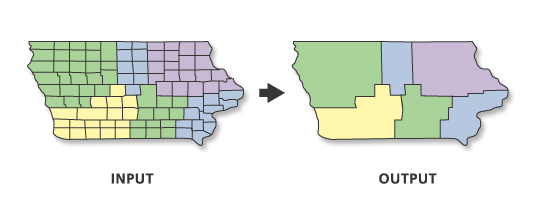

In [ ]:
#Then we can dissolve our new data frame; this will group the old indexes and sum the graffiti count.graf_block = graf_block.dissolve(by='index', aggfunc='sum')


In [ ]:
# we create a dicctionary with two datasets


## Creating the map

I loaded two datasets in this example, one with all the polygons, and another with the data we worked on. That’s so I can plot one layer with only the blocks that had a graffiti, and one with all the blocks, just outlining the city.

## Save the config.py and html map

In [ ]:
# Save map_2 config to a file

